<a href="https://colab.research.google.com/github/nguyendoanquangnhat/CNN/blob/main/CNN_flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.utils import load_img,img_to_array
import numpy as np
from os import listdir
from numpy import asarray,save 
from keras import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle

flowers_folder='/content/drive/MyDrive/FLOWERS'
photos,labels=list(),list()

for file in listdir(flowers_folder):
   if file.endswith('.jpg'):
     output=0
     if file.startswith('apricot'):
       output=1
     elif file.startswith('daisy'):
       output=2
     elif file.startswith('lotus'):
       output=3
     elif file.startswith('rose'):
       output=4
     elif file.startswith('waterlily'):
       output=5
     photo=load_img(flowers_folder+'/'+file,target_size=(200,200))
     photo=img_to_array(photo)
     photos.append(photo)
     labels.append(output)

photos=asarray(photos)
labels=asarray(labels)

print(photos.shape,labels.shape)

save('flowers_photos.npy',photos)
save('flowers_labels.npy',labels)

(50, 200, 200, 3) (50,)


In [3]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
file=open('pix.data','wb')
pickle.dump((photos,labels),file)
file.close()

def load_data():
    file=open('pix.data','rb')
    (photos, labels)=pickle.load(file)
    file.close()
    return photos, labels

X,y=load_data()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [4]:
print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

X_train: (40, 200, 200, 3)
X_test: (10, 200, 200, 3)
y_train: (40, 5)
y_test: (10, 5)


In [7]:
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,LeakyReLU,Activation
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
from keras import losses
#from numpy.ma.core import reshape
   
classes=5

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(200,200,3),padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,kernel_size=(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(128,activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                  

In [8]:
batch_size=16
epochs=20   

model.compile(loss=losses.categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
train=model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
3/3 [==============================] - 6s 1s/step - loss: 1.6131 - accuracy: 0.1500
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 1.6097 - accuracy: 0.2500
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 1.6015 - accuracy: 0.2250
Epoch 4/20
3/3 [==============================] - 4s 1s/step - loss: 1.6030 - accuracy: 0.1750
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 1.5998 - accuracy: 0.2750
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 1.5926 - accuracy: 0.2500
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 1.5765 - accuracy: 0.2750
Epoch 8/20
3/3 [==============================] - 4s 1s/step - loss: 1.5539 - accuracy: 0.2500
Epoch 9/20
3/3 [==============================] - 5s 2s/step - loss: 1.4847 - accuracy: 0.4250
Epoch 10/20
3/3 [==============================] - 5s 1s/step - loss: 1.4115 - accuracy: 0.4000
Epoch 11/20
3/3 [==============================] 

In [9]:
model.save("/content/drive/MyDrive/AI/cnn_flowers.h5")

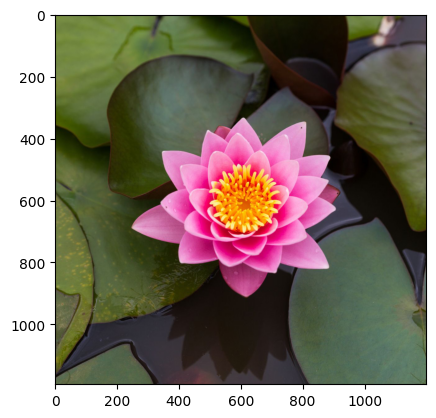

In [17]:
from keras.saving.saving_lib import load_model
import matplotlib.pyplot as plt
from keras.models import load_model

model=load_model("/content/drive/MyDrive/AI/cnn_flowers.h5")
img=load_img('/content/drive/MyDrive/FLOWERS/lotus5.jpg')
plt.imshow(img)
plt.show()

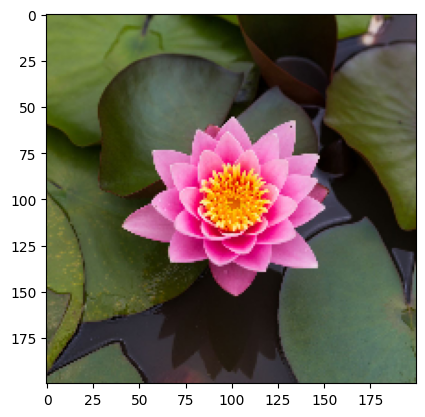

In [18]:
img=load_img('/content/drive/MyDrive/FLOWERS/lotus5.jpg',target_size=(200,200))
plt.imshow(img)

In [19]:
class_name = ['MAI','CÚC','SEN','HỒNG','SÚNG']
img=img_to_array(img)
img=img.reshape(1,200,200,3)
img=img.astype('float32')
img=img/255
predict=model.predict(img)
print("ĐÂY LÀ HOA", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))

1/1 [==============================] - 0s 124ms/step
ĐÂY LÀ HOA SEN [0. 0. 1. 0. 0.]
1.0


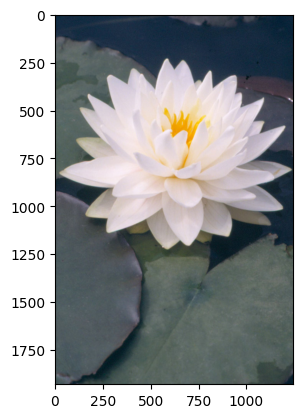

1/1 [==============================] - 0s 94ms/step
ĐÂY LÀ HOA SÚNG [0. 0. 0. 0. 1.]
1.0


In [21]:
img1=load_img('/content/drive/MyDrive/FLOWERS/waterlily3.jpg')
plt.imshow(img1)
plt.show()

img1=load_img('/content/drive/MyDrive/FLOWERS/waterlily3.jpg',target_size=(200,200))

img1=img_to_array(img1)
img1=img1.reshape(1,200,200,3)
img1=img1.astype('float32')
img1=img1/255
predict=model.predict(img1)
print("ĐÂY LÀ HOA", class_name[np.argmax(predict[0])], (predict[0]))
print(np.max(predict[0],axis=0))